### In this code, I'll be constructing an Ensemble model out of the results obtained from the previous linear models.

In [0]:
# Loading the predicted values from different linear models.
import numpy as np
import pandas as pd
# Ridge normal
y_pred_ridge_normal_tr = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/ensemble_data/y_pred_ridge_normal_tr.npy")
y_pred_ridge_normal_cv = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/ensemble_data/y_pred_ridge_normal_cv.npy")
y_pred_ridge_normal_te = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/ensemble_data/y_pred_ridge_normal_te.npy")
# Ridge binary
y_pred_ridge_binary_tr = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/ensemble_data/y_pred_ridge_binary_tr.npy")
y_pred_ridge_binary_cv = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/ensemble_data/y_pred_ridge_binary_cv.npy")
y_pred_ridge_binary_te = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/ensemble_data/y_pred_ridge_binary_te.npy")
# SVR normal
y_pred_svr_normal_tr = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/ensemble_data/y_pred_svr_normal_tr.npy")
y_pred_svr_normal_cv = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/ensemble_data/y_pred_svr_normal_cv.npy")
y_pred_svr_normal_te = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/ensemble_data/y_pred_svr_normal_te.npy")
# SVR binary
y_pred_svr_binary_tr = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/ensemble_data/y_pred_svr_binary_tr.npy")
y_pred_svr_binary_cv = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/ensemble_data/y_pred_svr_binary_cv.npy")
y_pred_svr_binary_te = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/ensemble_data/y_pred_svr_binary_te.npy")
# SGD-lr binary
y_pred_sgd_lr_binary_tr = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/ensemble_data/y_pred_sgd_lr_binary_tr.npy")
y_pred_sgd_lr_binary_cv = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/ensemble_data/y_pred_sgd_lr_binary_cv.npy")
y_pred_sgd_lr_binary_te = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/ensemble_data/y_pred_sgd_lr_binary_te.npy")
# SGD-svr binary
y_pred_sgd_svr_binary_tr = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/ensemble_data/y_pred_sgd_svr_binary_tr.npy")
y_pred_sgd_svr_binary_cv = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/ensemble_data/y_pred_sgd_svr_binary_cv.npy")
y_pred_sgd_svr_binary_te = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/ensemble_data/y_pred_sgd_svr_binary_te.npy")

In [0]:
from scipy import sparse
X_train_top = sparse.load_npz("drive/My Drive/marcari_kaggle_data/sparse_data/X_tr_top.npz")
X_cv_top = sparse.load_npz("drive/My Drive/marcari_kaggle_data/sparse_data/X_cv_top.npz")
X_test_top = sparse.load_npz("drive/My Drive/marcari_kaggle_data/sparse_data/X_test_top.npz")
test_id = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/test_id.npy")

In [0]:
# Standardizing the y-data to make it normally distributed.
from sklearn.preprocessing import StandardScaler
y_scaler = StandardScaler()

y_train = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/new_one/y_train_new.npy")
y_cv = np.load("drive/My Drive/marcari_kaggle_data/sparse_data/new_one/y_cv_new.npy")
y_train_std = y_scaler.fit_transform(np.log1p(y_train.reshape(-1, 1)))
y_cv_std = y_scaler.transform(np.log1p(y_cv.reshape(-1, 1)))

In [0]:
# concatenating the results column wise
y_pred_tr_ensemble = np.concatenate((y_pred_ridge_binary_tr.reshape(-1,1), y_pred_ridge_normal_tr.reshape(-1,1), y_pred_svr_normal_tr.reshape(-1,1), 
                        y_pred_svr_binary_tr.reshape(-1,1), y_pred_sgd_lr_binary_tr.reshape(-1,1), y_pred_sgd_svr_binary_tr.reshape(-1,1)), axis=1)
y_pred_cv_ensemble = np.concatenate((y_pred_ridge_binary_cv.reshape(-1,1), y_pred_ridge_normal_cv.reshape(-1,1), y_pred_svr_normal_cv.reshape(-1,1), 
                        y_pred_svr_binary_cv.reshape(-1,1), y_pred_sgd_lr_binary_cv.reshape(-1,1), y_pred_sgd_svr_binary_cv.reshape(-1,1)), axis=1)
y_pred_te_ensemble = np.concatenate((y_pred_ridge_binary_te.reshape(-1,1), y_pred_ridge_normal_te.reshape(-1,1), y_pred_svr_normal_te.reshape(-1,1), 
                        y_pred_svr_binary_te.reshape(-1,1), y_pred_sgd_lr_binary_te.reshape(-1,1), y_pred_sgd_svr_binary_te.reshape(-1,1)), axis=1)

### We have results from the underlying linear models, let's check the correlation of the results.

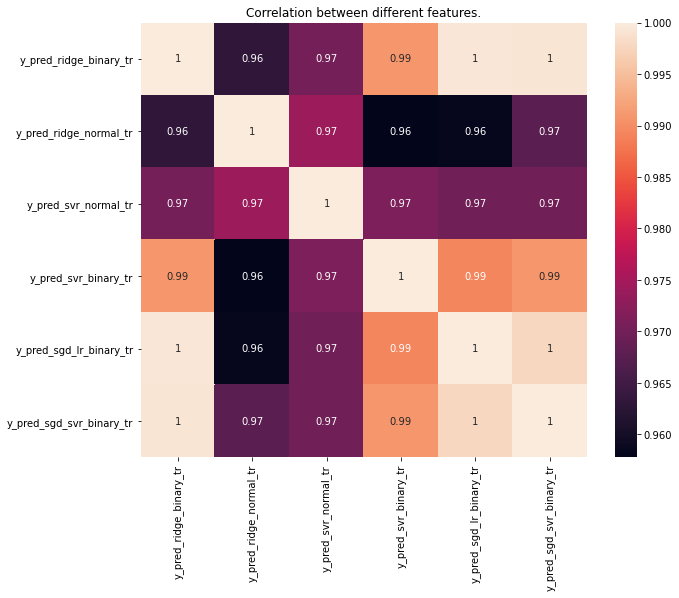

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
columns = ['y_pred_ridge_binary_tr', 'y_pred_ridge_normal_tr', 'y_pred_svr_normal_tr', 
            'y_pred_svr_binary_tr', 'y_pred_sgd_lr_binary_tr', 'y_pred_sgd_svr_binary_tr']
df = pd.DataFrame(y_pred_tr_ensemble, columns=columns)
Var_Corr = df.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
plt.title('Correlation between different features.')
plt.show()

#### We can see that the results from the underlying models are heavily correlated so there isn't much scope of getting a marginally well score from building an ensemble on them. To tackle this, I increased the dimensionality of this data by adding the top features that were gathered from the Linear model on binary data in part 1 of the assignment.

# Layer 2

#### Let's try with simple mean

In [52]:
# here I'm simply taking the mean of the results and checking the final loss.
from sklearn.metrics import mean_squared_log_error
# train loss
y_tr_mean = y_pred_tr_ensemble.mean(axis=1)
y_pred = np.expm1(y_scaler.inverse_transform(y_tr_mean.reshape(-1, 1))[:, 0])
train_loss = np.sqrt(mean_squared_log_error(y_train, y_pred))
# cv loss
y_cv_mean = y_pred_cv_ensemble.mean(axis=1)
y_pred = np.expm1(y_scaler.inverse_transform(y_cv_mean.reshape(-1, 1))[:, 0])
cv_loss = np.sqrt(mean_squared_log_error(y_cv, y_pred))
# test mean
y_te_mean = y_pred_te_ensemble.mean(axis=1)
print('train loss for', train_loss)
print('cv loss:', cv_loss)

train loss for 0.3825297090427252
cv loss: 0.4233495587647928


### Adding top features (calculated in part 1).

In [0]:
# Adding top features collected from ridge model trained on binary data (in part 1 of this assignment).
y_pred_tr_ensemble = sparse.hstack((sparse.csr_matrix(y_pred_tr_ensemble), X_train_top)).tocsr()
y_pred_cv_ensemble = sparse.hstack((sparse.csr_matrix(y_pred_cv_ensemble), X_cv_top)).tocsr()
y_pred_te_ensemble = sparse.hstack((sparse.csr_matrix(y_pred_te_ensemble), X_test_top)).tocsr()

#### Let's try with SGD-Regressor

In [4]:
# Let's fit the data using SGD-Regressor on different hyperparameters.
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
import time

regressor = SGDRegressor()
start_time = time.time()

prams = {'loss':['huber','epsilon_insensitive','squared_epsilon_insensitive','squared'], 'eta0':[10e-4, 10e-5, 10e-6],
         'epsilon':[10e-3,10e-4,10e-5,10e-6], 'max_iter':[1000,2000], 'learning_rate':['invscaling', 'adaptive', 'optimal'],
         'penalty':['l1','l2']}

r_cv = RandomizedSearchCV(regressor, param_distributions=prams, verbose=1, n_jobs=-1, cv=3)
r_cv.fit(y_pred_tr_ensemble, y_train_std.ravel())
print('Total time taken (mins):',(time.time()-start_time)/60)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 12.7min finished


Total time taken (mins): 12.8315110206604


In [6]:
r_cv.best_params_

{'epsilon': 0.01,
 'eta0': 0.001,
 'learning_rate': 'adaptive',
 'loss': 'squared_epsilon_insensitive',
 'max_iter': 1000,
 'penalty': 'l1'}

In [54]:
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import SGDRegressor

regressor = SGDRegressor(epsilon=0.01,eta0=0.0001, learning_rate='adaptive', 
                         loss='squared_epsilon_insensitive', max_iter=1000, penalty='l1')
regressor.fit(y_pred_tr_ensemble, y_train_std.ravel())

# train loss
y_pred = regressor.predict(y_pred_tr_ensemble)
y_pred = np.expm1(y_scaler.inverse_transform(y_pred.reshape(-1, 1))[:, 0])
train_loss = np.sqrt(mean_squared_log_error(y_train, y_pred))
# test loss
y_pred = regressor.predict(y_pred_cv_ensemble)
y_pred = np.expm1(y_scaler.inverse_transform(y_pred.reshape(-1, 1))[:, 0])
cv_loss = np.sqrt(mean_squared_log_error(y_cv, y_pred))
print('train loss for', train_loss)
print('cv loss:', cv_loss)

train loss for 0.32093321919755335
cv loss: 0.44193246452062995


#### Let's try with different Ridge and Linear-SVR models

In [0]:
from sklearn.metrics import mean_squared_log_error
def error(y_pred_tr, y_pred_cv, y_train, y_cv):
  # train loss
  y_pred = np.expm1(y_scaler.inverse_transform(y_pred_tr.reshape(-1, 1))[:, 0])
  train_loss = np.sqrt(mean_squared_log_error(y_train, y_pred))
  # test loss
  y_pred = np.expm1(y_scaler.inverse_transform(y_pred_cv.reshape(-1, 1))[:, 0])
  cv_loss = np.sqrt(mean_squared_log_error(y_cv, y_pred))
  return [train_loss, cv_loss]

In [9]:
# Let's fit the data using linearSVR with C=1.
from tqdm.notebook import tqdm
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import LinearSVR
from tqdm.notebook import tqdm
import time

ridge_loss = []
linearsvr_loss = []
alpha = [1e2,1e3,1e4,1e5,1e6,1e7]
C = [1e-2,1e-3,1e-4,1e-5,1e-6,1e-7]
start_time = time.time()
for a,c in tqdm(zip(alpha, C)):
  ridge = Ridge(alpha=a)
  ridge.fit(y_pred_tr_ensemble, y_train_std.ravel())
  ridge_loss.append(error(ridge.predict(y_pred_tr_ensemble), ridge.predict(y_pred_cv_ensemble), y_train, y_cv))
  
  svr = LinearSVR(C=c)
  svr.fit(y_pred_tr_ensemble, y_train_std.ravel())
  linearsvr_loss.append(error(svr.predict(y_pred_tr_ensemble), svr.predict(y_pred_cv_ensemble), y_train, y_cv))
print('time taken (mins):', (time.time()-start_time)/60)


time taken (mins): 2.273567001024882


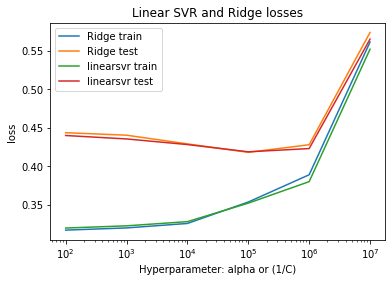

In [10]:
import matplotlib.pyplot as plt
ridge_loss = np.array(ridge_loss)
linearsvr_loss = np.array(linearsvr_loss)
plt.plot(alpha, ridge_loss.T[0], label='Ridge train')
plt.plot(alpha, ridge_loss.T[1], label='Ridge test')
plt.plot(alpha, linearsvr_loss.T[0], label='linearsvr train')
plt.plot(alpha, linearsvr_loss.T[1], label='linearsvr test')
plt.xlabel('Hyperparameter: alpha or (1/C)')
plt.ylabel('loss')
plt.xscale('log')
plt.title('Linear SVR and Ridge losses')
plt.legend()
plt.show()

In [77]:
from sklearn.metrics import mean_squared_log_error

regressor = Ridge(alpha=100000)
regressor.fit(y_pred_tr_ensemble, y_train_std)
# train loss
y_pred = regressor.predict(y_pred_tr_ensemble)
y_pred = np.expm1(y_scaler.inverse_transform(y_pred.reshape(-1, 1))[:, 0])
train_loss = np.sqrt(mean_squared_log_error(y_train, y_pred))
# test loss
y_pred = regressor.predict(y_pred_cv_ensemble)
y_pred = np.expm1(y_scaler.inverse_transform(y_pred.reshape(-1, 1))[:, 0])
cv_loss = np.sqrt(mean_squared_log_error(y_cv, y_pred))
print('train loss for', train_loss)
print('cv loss:', cv_loss)

train loss for 0.35335178784495086
cv loss: 0.4179169633981161


In [14]:
from sklearn.metrics import mean_squared_log_error

regressor = LinearSVR(C=0.00001)
regressor.fit(y_pred_tr_ensemble, y_train_std.ravel())
# train loss
y_pred = regressor.predict(y_pred_tr_ensemble)
y_pred = np.expm1(y_scaler.inverse_transform(y_pred.reshape(-1, 1))[:, 0])
train_loss = np.sqrt(mean_squared_log_error(y_train, y_pred))
# test loss
y_pred = regressor.predict(y_pred_cv_ensemble)
y_pred = np.expm1(y_scaler.inverse_transform(y_pred.reshape(-1, 1))[:, 0])
cv_loss = np.sqrt(mean_squared_log_error(y_cv, y_pred))
print('train loss for', train_loss)
print('cv loss:', cv_loss)

train loss for 0.3518833071431016
cv loss: 0.4186129605768532


In [10]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["model","layer","best hyperparameters","train loss","cv loss"]
x.add_row(['Simple mean','layer 2', '-', 0.3825297090427252, 0.4233495587647928])
x.add_row(['SGD Regressor','layer 2', "epsilon: 0.01, eta0: 0.0001,  penalty: 'l1', max_iter: 1000\nloss: 'squared_epsilon_insensitive', learning_rate: 'adaptive'", 0.32093321919755335, 0.44193246452062995])
x.add_row(['Ridge','layer 2','alpha=100000', 0.35335178784495086, 0.4179169633981161])
x.add_row(['LinearSVR','layer 2', 'C=0.00001', 0.3518833071431016, 0.4186129605768532])

print(x)

+---------------+---------+----------------------------------------------------------------+---------------------+---------------------+
|     model     |  layer  |                      best hyperparameters                      |      train loss     |       cv loss       |
+---------------+---------+----------------------------------------------------------------+---------------------+---------------------+
|  Simple mean  | layer 2 |                               -                                |  0.3825297090427252 |  0.4233495587647928 |
| SGD Regressor | layer 2 |  epsilon: 0.01, eta0: 0.0001,  penalty: 'l1', max_iter: 1000   | 0.32093321919755335 | 0.44193246452062995 |
|               |         | loss: 'squared_epsilon_insensitive', learning_rate: 'adaptive' |                     |                     |
|     Ridge     | layer 2 |                          alpha=100000                          | 0.35335178784495086 |  0.4179169633981161 |
|   LinearSVR   | layer 2 |              

#### We can see that Ridge and Linear SVR models perform the best in this layer so I'll be using the output from those in layer 3

# Layer 3

#### Collecting and concatenating data from previous layers

In [0]:
regressor = Ridge(alpha=100000)
regressor.fit(y_pred_tr_ensemble, y_train_std.ravel())
y_tr_ridge = regressor.predict(y_pred_tr_ensemble)
y_cv_ridge = regressor.predict(y_pred_cv_ensemble)
y_te_ridge = regressor.predict(y_pred_te_ensemble)

In [0]:
regressor = LinearSVR(C=0.00001)
regressor.fit(y_pred_tr_ensemble, y_train_std.ravel())
y_tr_svr = regressor.predict(y_pred_tr_ensemble)
y_cv_svr = regressor.predict(y_pred_cv_ensemble)
y_te_svr = regressor.predict(y_pred_te_ensemble)

In [0]:
y_pred_tr = np.concatenate((y_tr_ridge.reshape(-1,1), y_tr_svr.reshape(-1,1)), axis=1)#.mean(axis=1)
y_pred_cv = np.concatenate((y_cv_ridge.reshape(-1,1), y_cv_svr.reshape(-1,1)), axis=1)#.mean(axis=1)
y_pred_te = np.concatenate((y_te_ridge.reshape(-1,1), y_te_svr.reshape(-1,1)), axis=1)#.mean(axis=1)

#### Let's use the mean of the data as predicted price

In [47]:
# train loss
y_pred = y_pred_tr.mean(axis=1)
y_pred = np.expm1(y_scaler.inverse_transform(y_pred.reshape(-1, 1))[:, 0])
train_loss = np.sqrt(mean_squared_log_error(y_train, y_pred))
# test loss
y_pred = y_pred_cv.mean(axis=1)
y_pred = np.expm1(y_scaler.inverse_transform(y_pred.reshape(-1, 1))[:, 0])
cv_loss = np.sqrt(mean_squared_log_error(y_cv, y_pred))
print('train loss for', train_loss)
print('cv loss:', cv_loss)

train loss for 0.35239392799098546
cv loss: 0.4180749776962736


#### Let's fit this on a SGD regressor

In [35]:
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
import time

regressor = SGDRegressor()

prams = {'loss':['huber','epsilon_insensitive','squared_epsilon_insensitive'], 'eta0':[10e-4, 10e-5, 10e-6, 10e-7],
         'epsilon':[10e-3,10e-4,10e-5,10e-6,10e-7], 'max_iter':[1000,2000], 'learning_rate':['invscaling', 'adaptive', 'optimal'],
         'penalty':['l1','l2']}

r_cv = RandomizedSearchCV(regressor, param_distributions=prams, verbose=1, n_jobs=-1, cv=3)
r_cv.fit(y_pred_tr, y_train_std.ravel())
r_cv.best_params_

{'epsilon': 0.000001,
 'eta0': 0.000001,
 'learning_rate': 'adaptive',
 'loss': 'squared_epsilon_insensitive',
 'max_iter': 1000,
 'penalty': 'l2'}


In [48]:
from tqdm.notebook import tqdm
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge
from sklearn.svm import LinearSVR
import time
start_time = time.time()
regressor = SGDRegressor(eta0=10e-6,epsilon=10e-6,loss='squared_epsilon_insensitive', learning_rate='adaptive',max_iter= 1000, penalty='l2')
regressor.fit(y_pred_tr, y_train_std.ravel())
print('time taken (mins):', (time.time()-start_time)/60)

time taken (mins): 0.06803916692733765


In [49]:
# train loss
y_pred = regressor.predict(y_pred_tr)
y_pred = np.expm1(y_scaler.inverse_transform(y_pred.reshape(-1, 1))[:, 0])
train_loss = np.sqrt(mean_squared_log_error(y_train, y_pred))
# test loss
y_pred = regressor.predict(y_pred_cv)
y_pred = np.expm1(y_scaler.inverse_transform(y_pred.reshape(-1, 1))[:, 0])
cv_loss = np.sqrt(mean_squared_log_error(y_cv, y_pred))
print('train loss for', train_loss)
print('cv loss:', cv_loss)

train loss for 0.35144787568096036
cv loss: 0.41954995189733146


#### Let's fit the data using Ridge and linear-SVR.

In [69]:
from tqdm.notebook import tqdm
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import LinearSVR
import time

ridge_loss = []
linearsvr_loss = []
alpha = [1e3,1e4,1e5,1e6,1e7]
C = [1e-3,1e-4,1e-5,1e-6,1e-7]
start_time = time.time()
for a,c in tqdm(zip(alpha, C)):
  ridge = Ridge(alpha=a)
  ridge.fit(y_pred_tr, y_train_std.ravel())
  ridge_loss.append(error(ridge.predict(y_pred_tr), ridge.predict(y_pred_cv), y_train, y_cv))
  
  svr = LinearSVR(C=c)
  svr.fit(y_pred_tr, y_train_std.ravel())
  linearsvr_loss.append(error(svr.predict(y_pred_tr), svr.predict(y_pred_cv), y_train, y_cv))
print('time taken (mins):', (time.time()-start_time)/60)


time taken (mins): 0.15453486839930217


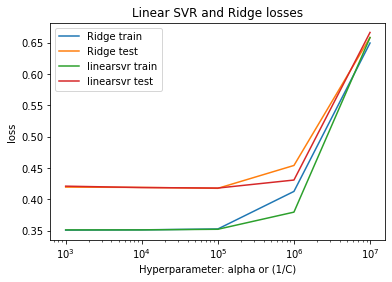

In [70]:
import matplotlib.pyplot as plt
ridge_loss = np.array(ridge_loss)
linearsvr_loss = np.array(linearsvr_loss)
plt.plot(alpha, ridge_loss.T[0], label='Ridge train')
plt.plot(alpha, ridge_loss.T[1], label='Ridge test')
plt.plot(alpha, linearsvr_loss.T[0], label='linearsvr train')
plt.plot(alpha, linearsvr_loss.T[1], label='linearsvr test')
plt.xlabel('Hyperparameter: alpha or (1/C)')
plt.ylabel('loss')
plt.xscale('log')
plt.title('Linear SVR and Ridge losses')
plt.legend()
plt.show()

In [79]:
from sklearn.metrics import mean_squared_log_error

regressor = Ridge(alpha=100000)
regressor.fit(y_pred_tr, y_train_std.ravel())
# train loss
y_pred = regressor.predict(y_pred_tr)
y_pred = np.expm1(y_scaler.inverse_transform(y_pred.reshape(-1, 1))[:, 0])
train_loss = np.sqrt(mean_squared_log_error(y_train, y_pred))
# test loss
y_pred = regressor.predict(y_pred_cv)
y_pred = np.expm1(y_scaler.inverse_transform(y_pred.reshape(-1, 1))[:, 0])
cv_loss = np.sqrt(mean_squared_log_error(y_cv, y_pred))
print('train loss for', train_loss)
print('cv loss:', cv_loss)

train loss for 0.35292401422575376
cv loss: 0.4178132289505655


In [13]:
from prettytable import PrettyTable
x = PrettyTable()
x.add_row(['simple mean','layer 3', '-', 0.35239392799098546, 0.4180749776962736])
x.add_row(['SGD Regressor','layer 3', "epsilon: 1e-6, eta0: 1e-6,  penalty: 'l2', max_iter: 1000\nloss: 'squared_epsilon_insensitive', learning_rate: 'adaptive'", 0.35144787568096036, 0.41954995189733146])
x.add_row(['Ridge','layer 3', 'alpha=100000', 0.35292401422575376, 0.4178132289505655])

print(x)

+---------------+---------+----------------------------------------------------------------+---------------------+---------------------+
|    Field 1    | Field 2 |                            Field 3                             |       Field 4       |       Field 5       |
+---------------+---------+----------------------------------------------------------------+---------------------+---------------------+
|  simple mean  | layer 3 |                               -                                | 0.35239392799098546 |  0.4180749776962736 |
| SGD Regressor | layer 3 |   epsilon: 1e-6, eta0: 1e-6,  penalty: 'l2', max_iter: 1000    | 0.35144787568096036 | 0.41954995189733146 |
|               |         | loss: 'squared_epsilon_insensitive', learning_rate: 'adaptive' |                     |                     |
|     Ridge     | layer 3 |                          alpha=100000                          | 0.35292401422575376 |  0.4178132289505655 |
+---------------+---------+--------------

### Ridge model seems to yield the best results.

In [0]:
output = pd.DataFrame()
y_test = regressor.predict(y_pred_te)
output['test_id'] = test_id
output['price'] = np.expm1(y_scaler.inverse_transform(y_test.reshape(-1, 1))[:, 0])
output.to_csv('drive/My Drive/marcari_kaggle_data/output/submission.csv', index=False)

In [9]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["model","layer","best hyperparameters","train loss","cv loss"]
x.add_row(['Simple mean','layer 2', '-', 0.3825297090427252, 0.4233495587647928])
x.add_row(['SGD Regressor','layer 2', "epsilon: 0.01, eta0: 0.0001,  penalty: 'l1', max_iter: 1000\nloss: 'squared_epsilon_insensitive', learning_rate: 'adaptive'", 0.32093321919755335, 0.44193246452062995])
x.add_row(['Ridge','layer 2','alpha=100000', 0.35335178784495086, 0.4179169633981161])
x.add_row(['LinearSVR','layer 2', 'C=0.00001', 0.3518833071431016, 0.4186129605768532])
x.add_row(['simple mean','layer 3', '-', 0.35239392799098546, 0.4180749776962736])
x.add_row(['SGD Regressor','layer 3', "epsilon: 1e-6, eta0: 1e-6,  penalty: 'l2', max_iter: 1000\nloss: 'squared_epsilon_insensitive', learning_rate: 'adaptive'", 0.35144787568096036, 0.41954995189733146])
x.add_row(['Ridge','layer 3', 'alpha=100000', 0.35292401422575376, 0.4178132289505655])

print(x)

+---------------+---------+----------------------------------------------------------------+---------------------+---------------------+
|     model     |  layer  |                      best hyperparameters                      |      train loss     |       cv loss       |
+---------------+---------+----------------------------------------------------------------+---------------------+---------------------+
|  Simple mean  | layer 2 |                               -                                |  0.3825297090427252 |  0.4233495587647928 |
| SGD Regressor | layer 2 |  epsilon: 0.01, eta0: 0.0001,  penalty: 'l1', max_iter: 1000   | 0.32093321919755335 | 0.44193246452062995 |
|               |         | loss: 'squared_epsilon_insensitive', learning_rate: 'adaptive' |                     |                     |
|     Ridge     | layer 2 |                          alpha=100000                          | 0.35335178784495086 |  0.4179169633981161 |
|   LinearSVR   | layer 2 |              

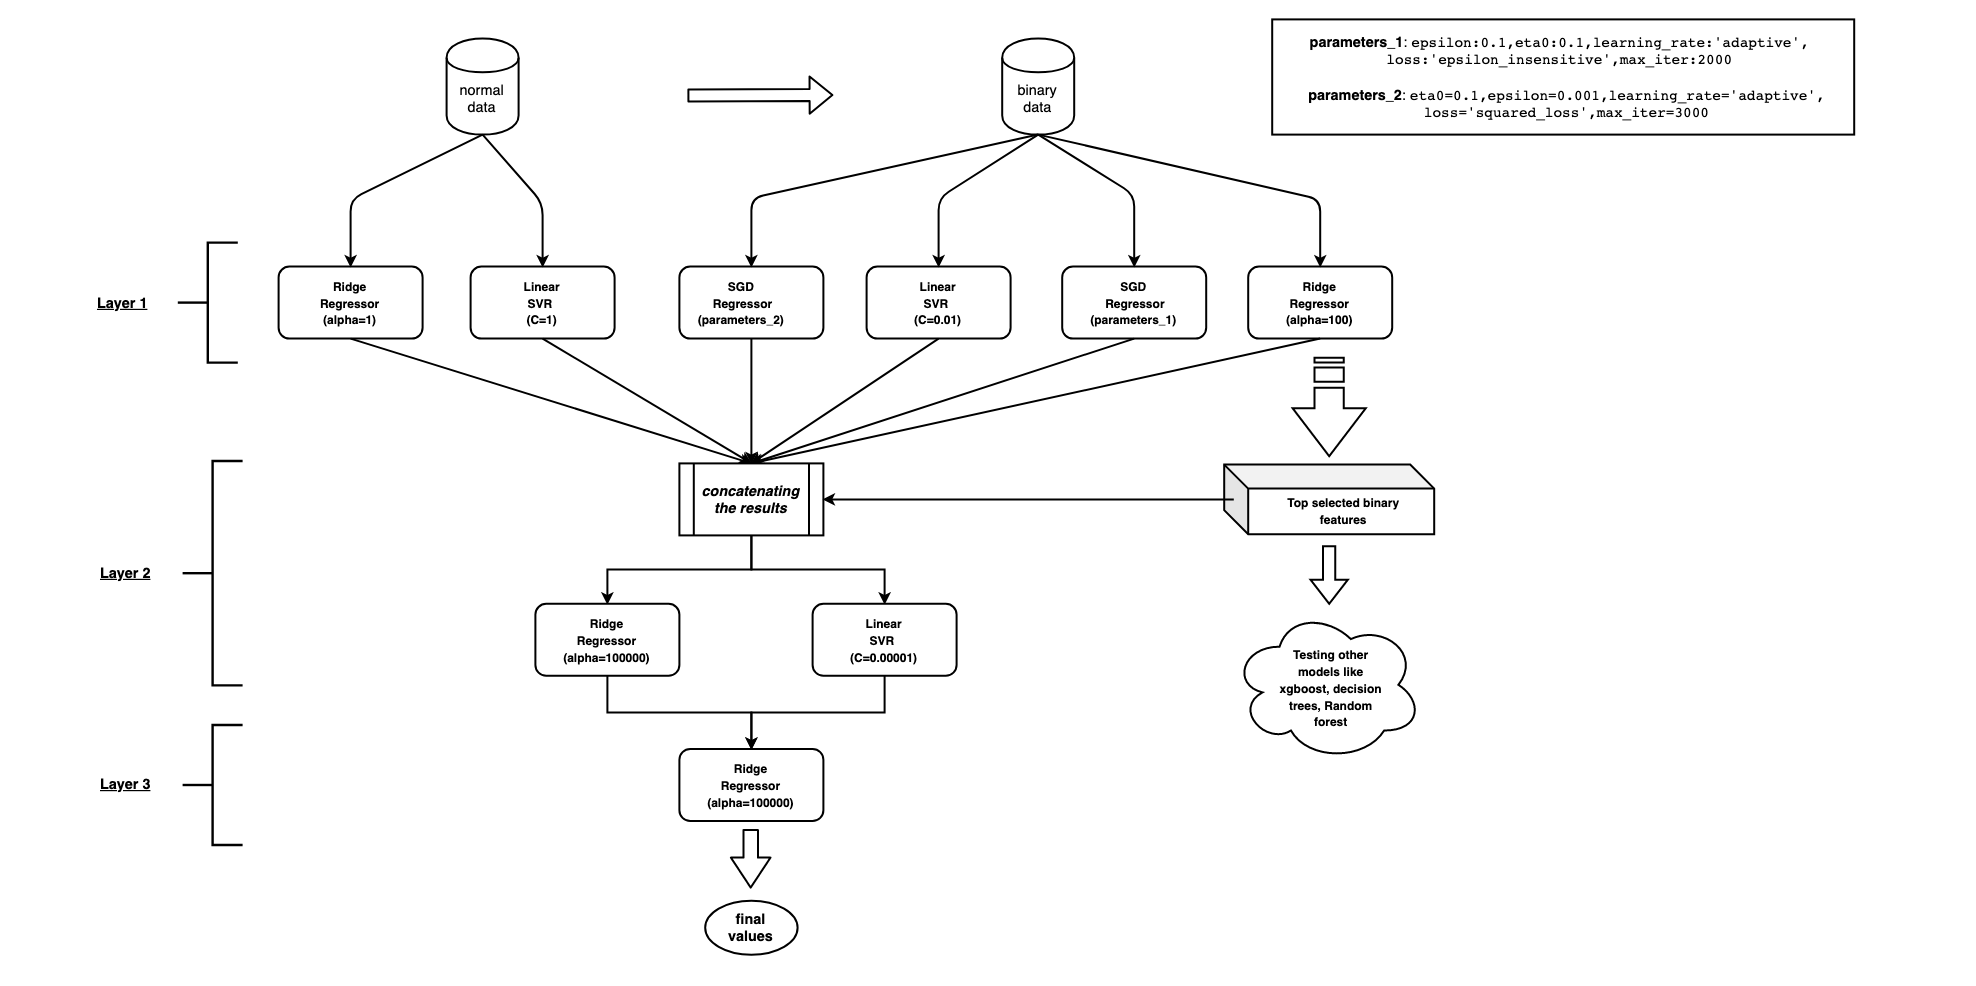

In [18]:
%matplotlib inline
from IPython.display import Image
Image('final.png', width=1600, height=700)